# Earthquake Data Visualization with Pandas

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

POSTGRES_USER = os.environ.get("POSTGRES_USER")
POSTGRES_PASSWORD = os.environ.get("POSTGRES_PASSWORD")
POSTGRES_DB = os.environ.get("POSTGRES_DB")
POSTGRES_HOST = os.environ.get("POSTGRES_HOST")
POSTGRES_PORT = os.environ.get("POSTGRES_PORT")


conn = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
engine = create_engine(conn)

In [3]:
query = "Select * from updated_data;"

df = pd.read_sql_query(query, conn)

df.describe()

,index,id,magnitude,latitude,longitude,depth,utc_time
count,179623.000000,179623.000000,179623.000000,179623.000000,179623.000000,179623.000000,179623
mean,89811.000000,89812.000000,2.154777,39.229089,-107.433612,34.049668,2023-06-11 01:20:42.432083200
min,0.000000,1.000000,1.000000,-65.849700,-179.998700,-3.740000,2022-08-07 01:56:38
25%,44905.500000,44906.500000,1.300000,31.618324,-153.203800,5.510000,2023-01-02 06:06:59.500000
50%,89811.000000,89812.000000,1.800000,39.156333,-137.634000,10.000000,2023-06-03 14:35:37
75%,134716.500000,134717.500000,2.500000,59.790700,-110.293167,35.000000,2023-11-14 22:18:08
max,179622.000000,179623.000000,7.800000,86.593900,179.999400,681.240000,2024-05-02 19:18:10
std,51852.838039,51852.838039,1.138359,23.113004,84.495356,65.746675,NaN


## Sort By UTC time

In [4]:
df.sort_values(by="utc_time", ascending=False).head()

# df.sort_values(by="utc_time", ascending=False).tail()


,index,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
165902,165902,179386,74208282,hv74208282,"8 km S of Volcano, Hawaii","Volcano, Hawaii",USA,1.9,19.363667,-155.241669,0.38,2024-05-02 19:18:10,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
165903,165903,179387,75000081,nc75000081,"8 km WNW of Cobb, California","Cobb, California",USA,1.0,38.848667,-122.812836,1.77,2024-05-02 19:12:33,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
165904,165904,179388,75000071,nc75000071,"8 km WNW of Cobb, California","Cobb, California",USA,2.5,38.846169,-122.810997,1.59,2024-05-02 19:12:07,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
165905,165905,179389,75000061,nc75000061,"8 km WNW of Cobb, California","Cobb, California",USA,1.1,38.846668,-122.813164,1.62,2024-05-02 19:08:45,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
165906,165906,179390,74208222,hv74208222,"3 km SW of Volcano, Hawaii","Volcano, Hawaii",USA,2.0,19.420834,-155.258331,-0.98,2024-05-02 18:55:29,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By Magnitude - highest to lowest

In [5]:
df.sort_values(by="magnitude", ascending=False).head()

,index,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
73516,73516,86999,6000jllz,us6000jllz,"Pazarcik earthquake, Kahramanmaras earthquake ...",Pazarcik earthquake,Kahramanmaras earthquake sequence,7.8,37.2256,37.0143,10.00,2023-02-06 01:17:34,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
49471,49469,62952,6000kd0n,us6000kd0n,southeast of the Loyalty Islands,the Loyalty Islands,Loyalty Islands,7.7,-23.2063,170.7423,18.05,2023-05-19 02:57:03,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
120595,120595,134079,7000i9bw,us7000i9bw,"35 km SSW of Aguililla, Mexico",Aguililla,Mexico,7.6,18.4552,-102.9561,26.94,2022-09-19 18:05:08,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
118110,118110,131593,6000iitd,us6000iitd,"70 km E of Kainantu, Papua New Guinea",Kainantu,Papua New Guinea,7.6,-6.2944,146.5038,116.00,2022-09-10 23:47:00,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
175749,175748,9604,7000lff4,us7000lff4,"19 km E of Gamut, Philippines",Gamut,Philippines,7.6,8.5266,126.4161,40.00,2023-12-02 14:37:04,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By Depth

In [6]:
df.sort_values(by="depth", ascending=False).head()

,index,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
72128,72128,85611,6000k2db,us6000k2db,"208 km ENE of Sola, Vanuatu",Sola,Vanuatu,4.0,-13.1462,169.3241,681.24,2023-04-01 18:09:17,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
20304,20304,33785,7000kxdn,us7000kxdn,Vanuatu region,Vanuatu region,Vanuatu,4.2,-15.1098,171.6867,675.27,2023-09-18 15:35:27,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
150415,150415,163899,6000mivr,us6000mivr,Fiji region,Fiji region,Fiji,4.2,-19.3114,-177.8158,671.04,2024-03-08 22:42:23,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
99552,99552,113032,7000ingi,us7000ingi,south of the Fiji Islands,the Fiji Islands,Fiji,7.0,-26.0901,178.3427,660.00,2022-11-09 09:51:04,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
99650,99650,113130,7000inmi,us7000inmi,south of the Fiji Islands,the Fiji Islands,Fiji,4.9,-26.0355,178.4719,656.43,2022-11-09 18:41:04,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Correlation

When interpreting correlation coefficients, the values range from -1 to 1:

- 1 indicates a perfect positive correlation: As one variable increases, the other variable increases proportionally.
- -1 indicates a perfect negative correlation: As one variable increases, the other variable decreases proportionally.
- 0 indicates no linear correlation: There is no linear relationship between the variables.

More explaination on correlation at this [correlation-matrix article](https://builtin.com/data-science/correlation-matrix)

In [7]:
df[["magnitude", "depth"]].corr()

,magnitude,depth
magnitude,1.00000,0.30085
depth,0.30085,1.00000


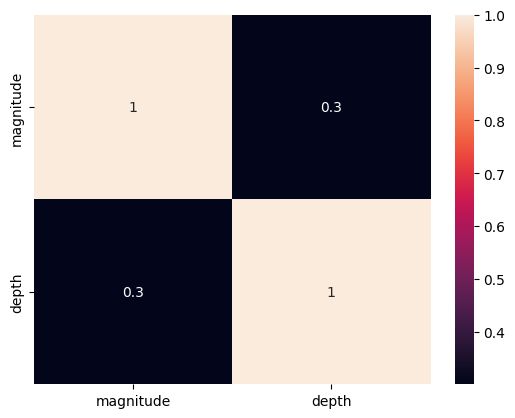

In [8]:
sns.heatmap(df[["magnitude", "depth"]].corr(), annot=True)
plt.show()

- The correlation coefficient between "magnitude" and "magnitude" is 1, which is a perfect positive correlation. This is expected since a variable is always perfectly correlated with itself.
- The correlation coefficient between "depth" and "depth" is 1, indicating a perfect positive correlation, as expected.
- The correlation coefficient between "magnitude" and "depth" is 0.296152. This positive value indicates a positive correlation, but it's not close to 1, indicating a weak positive linear relationship between magnitude and depth.

In [9]:
df[["magnitude", "depth", "latitude", "longitude"]].corr()

,magnitude,depth,latitude,longitude
magnitude,1.000000,0.300850,-0.629450,0.658787
depth,0.300850,1.000000,-0.194578,0.105518
latitude,-0.629450,-0.194578,1.000000,-0.476685
longitude,0.658787,0.105518,-0.476685,1.000000


- **Magnitude and Depth**: 
  - There is a weak positive correlation (0.296152) between magnitude and depth, indicating that there is a tendency for earthquakes with higher magnitudes to occur at slightly greater depths. However, the correlation is not strong.
- **Magnitude and Latitude**: 
  - There is a moderate negative correlation (-0.582706) between magnitude and latitude. This suggests that earthquakes with higher magnitudes tend to occur at lower latitudes (closer to the equator) and vice versa.
- **Magnitude and Longitude**: 
  - There is a strong positive correlation (0.672386) between magnitude and longitude. This indicates that earthquakes with higher magnitudes tend to occur at specific longitudes, and as longitude increases, the magnitude of earthquakes tends to increase as well.
- **Depth and Latitude**: 
  - There is a weak negative correlation (-0.117502) between depth and latitude, suggesting that there is a slight tendency for deeper earthquakes to occur at lower latitudes, but the correlation is not strong.
- **Depth and Longitude**: 
  - There is a weak positive correlation (0.126228) between depth and longitude, indicating a slight tendency for deeper earthquakes to occur at specific longitudes, but the correlation is not strong.
- **Latitude and Longitude**: 
  - There is a moderate negative correlation (-0.488058) between latitude and longitude, suggesting that earthquakes tend to occur at specific latitudes and longitudes. This could indicate geological features or fault lines influencing the distribution of earthquakes.

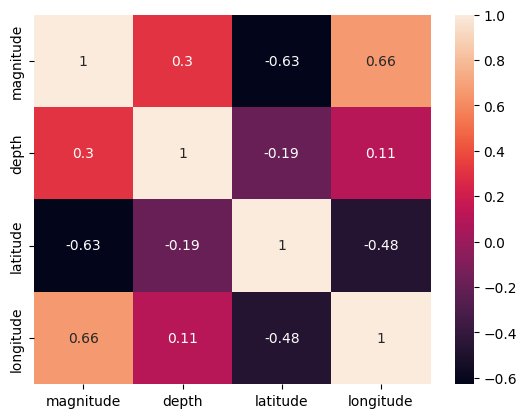

In [10]:
sns.heatmap(df[["magnitude", "depth", "latitude", "longitude"]].corr(), annot=True)
plt.show()

In [11]:
df.columns

Index(['index', 'id', 'code', 'event_id', 'place', 'city', 'country',
       'magnitude', 'latitude', 'longitude', 'depth', 'utc_time', 'url',
       'details'],
      dtype='object')

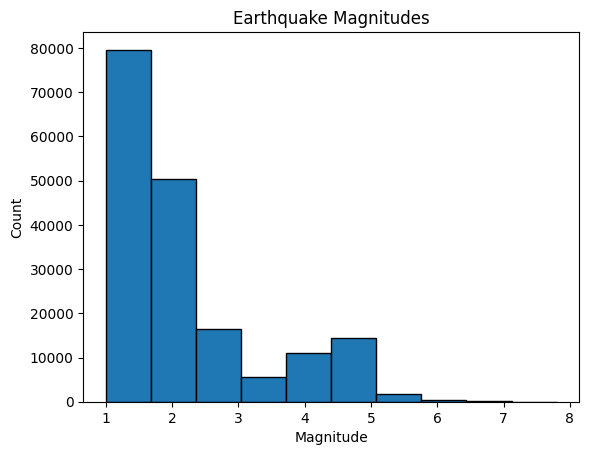

In [12]:
plt.hist(df["magnitude"], bins=10, edgecolor="black")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Earthquake Magnitudes")
plt.show()

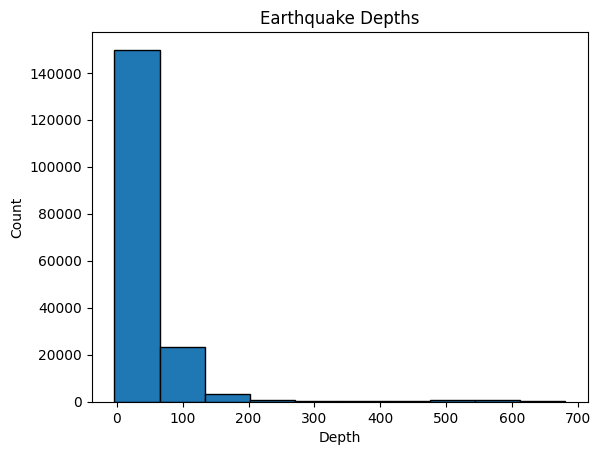

In [13]:
plt.hist(df["depth"], bins=10, edgecolor="black")
plt.xlabel("Depth")
plt.ylabel("Count")
plt.title("Earthquake Depths")
plt.show()

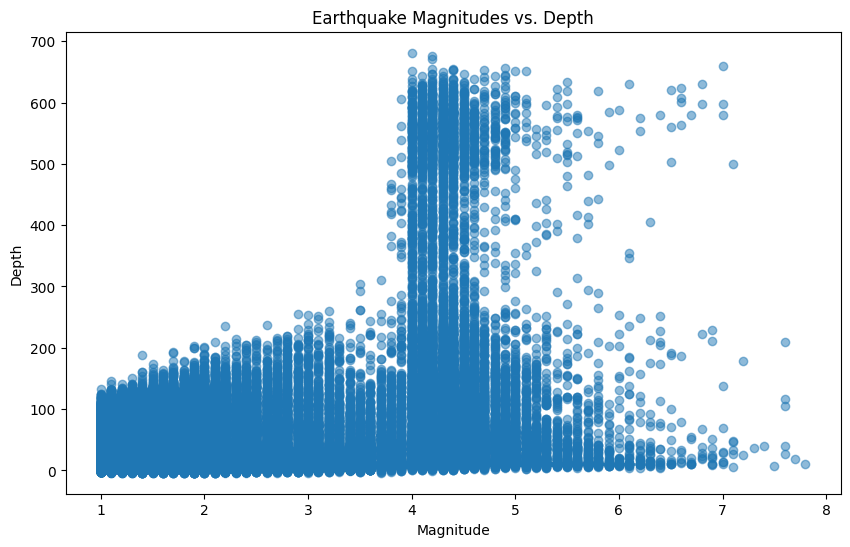

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["magnitude"], df["depth"], alpha=0.5)
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.title("Earthquake Magnitudes vs. Depth")
plt.show()

In [16]:
df["country"].value_counts().head(10)

country
USA                 144510
Puerto Rico           5921
Indonesia             2767
Japan                 2044
Philippines           1784
Fiji                  1469
Papua New Guinea      1181
Mexico                1093
Tonga                 1070
Chile                  972
Name: count, dtype: int64

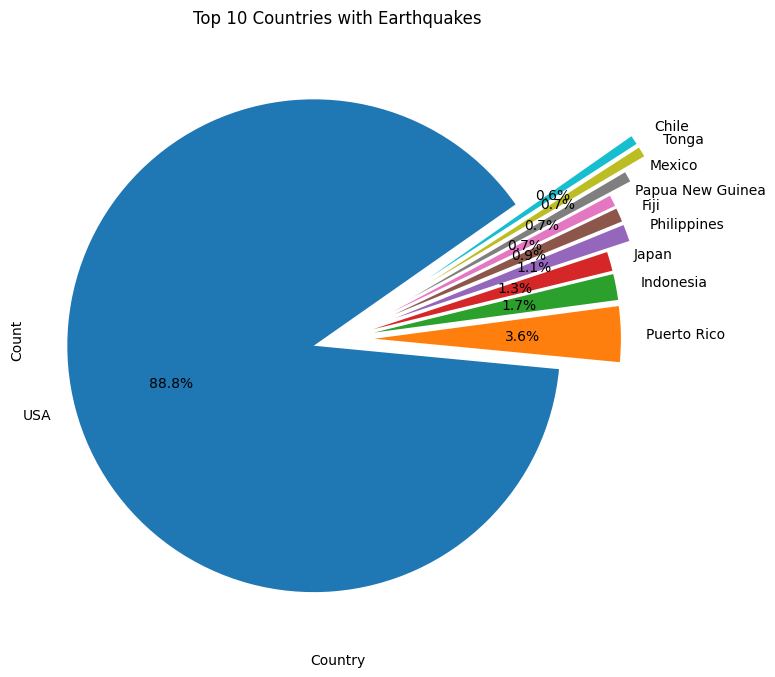

In [17]:
country_counts = df["country"].value_counts().head(10)

explode = (0.1, 0.15, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.45, 0.45)

plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, explode=explode,autopct='%1.1f%%', startangle=35)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Countries with Earthquakes")
plt.show()


In [18]:
engine.dispose()